In [14]:
PROJECT_DIR = ''
APP_SYS_NAME = 'BGL'
#APP_SYS_NAME = 'Thunderbird'

BASE_DIR = PROJECT_DIR + 'output/'

In [15]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, confusion_matrix , precision_score, recall_score, f1_score
from sklearn.metrics import completeness_score, homogeneity_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from scipy.spatial.distance import cosine
import warnings
import matplotlib.pyplot as plt
import sys
import subprocess
import random
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.linear_model import SGDOneClassSVM
import matplotlib.pyplot as plt

random.seed(2)
sys.path.append(PROJECT_DIR) # this is done to make the import of ad_feature_extraction work
from ad_feature_extraction import parsers

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from matplotlib.lines import Line2D

random_state=5

Input_data Shape: (189000, 76)
label
False    178385
True      10615
Name: count, dtype: int64


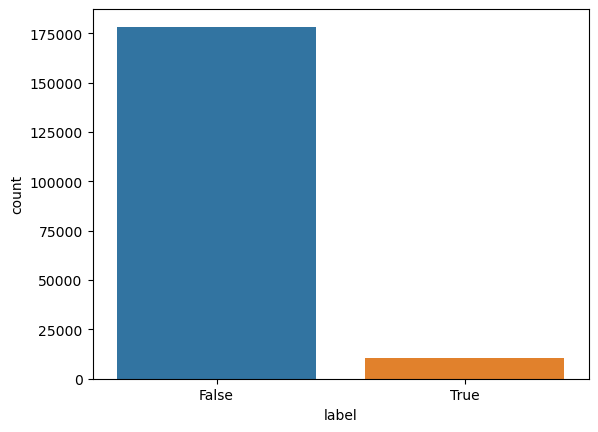

In [16]:
input_data = pd.read_csv(BASE_DIR + APP_SYS_NAME + '_clusters2.csv')

print("Input_data Shape:",input_data.shape)
print(input_data['label'].value_counts())

sns.countplot(x=input_data['label'])
plt.show()

In [17]:
def createGradientBoostingClassifier():
    return GradientBoostingClassifier(random_state=0)

def createLogisticRegression():
    return LogisticRegression(class_weight='balanced', random_state=random_state)

def createXGBClassifier():
    return XGBClassifier(booster="gbtree", n_estimators=2, max_depth=2, learning_rate=0.3, objective='binary:logistic')

def createIsolationForest(contamination=0.05):
    return IsolationForest(contamination=contamination, random_state=random_state)

def createSGDOneClassSVM(nu = 0.05):
    return SGDOneClassSVM(nu=nu, shuffle=True, fit_intercept=True, random_state=42, tol=1e-4)

def getSupervisedModels():
    return [createGradientBoostingClassifier(), createLogisticRegression(), createXGBClassifier()]

def getUnsupervisedModels(threshold=0.05):
    return [createIsolationForest(threshold), createSGDOneClassSVM(threshold)]

# Effect of cluster filtering

In [18]:
clusters = input_data['clusters'].values
clusters2 = input_data['cluster2'].values

print("Between first and second clustering:____________________________")
print(f"Completeness Score: \n {completeness_score(clusters, clusters2)}\n")
print(f"Homogeneity Score: \n {homogeneity_score(clusters, clusters2)}\n") 

Between first and second clustering:____________________________
Completeness Score: 
 0.9374711826480283

Homogeneity Score: 
 0.9357910327699535



In [19]:
labels = input_data['label']
print("Between first clusters and label:____________________________")
print(f"Completeness Score: \n {completeness_score(labels, clusters)}\n")
print(f"Homogeneity Score: \n {homogeneity_score(labels, clusters)}\n") 

print("Between second clusters and label:____________________________")
print(f"Completeness Score: \n {completeness_score(labels, clusters2)}\n")
print(f"Homogeneity Score: \n {homogeneity_score(labels, clusters2)}\n") 



Between first clusters and label:____________________________
Completeness Score: 
 0.06510740186905081

Homogeneity Score: 
 0.785871704772

Between second clusters and label:____________________________
Completeness Score: 
 0.07023127304906958

Homogeneity Score: 
 0.8461995316847819



# Parameter effect on supervised learning

In [20]:
def report(report_name, label_pred, labels):
    report = pd.DataFrame(classification_report(labels, label_pred, output_dict=True))
    print(f"{report_name} Result:\n================================================")        
    print(f"Accuracy Score: {accuracy_score(labels, label_pred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{report}")
    print("_______________________________________________")
    print(f"Confusion Matrix: \n {confusion_matrix(labels, label_pred)}\n")
    print("_______________________________________________")
    print(f'F1 Score: \n {f1_score(labels, label_pred)}')
    print("_______________________________________________")
    print(f'Precision Score: \n {precision_score(labels, label_pred)}')
    print("_______________________________________________")
    print(f'Recall Score: \n {recall_score(labels, label_pred)}')
    print("_______________________________________________")
    print(f'Roc AUC Score: \n {roc_auc_score(labels, label_pred)}')
   
    ConfusionMatrixDisplay.from_predictions(labels, label_pred)
    plt.show()
    
    PrecisionRecallDisplay.from_predictions(labels, label_pred, name=report_name)
    plt.show()

With Params GradientBoostingClassifier Train Result:
Accuracy Score: 95.34%
_______________________________________________
CLASSIFICATION REPORT:
                       0            1  accuracy      macro avg   weighted avg
precision       0.955411     0.818664  0.953366       0.887038       0.947731
recall          0.997127     0.217970  0.953366       0.607548       0.953366
f1-score        0.975824     0.344276  0.953366       0.660050       0.940353
support    142708.000000  8492.000000  0.953366  151200.000000  151200.000000
_______________________________________________
Confusion Matrix: 
 [[142298    410]
 [  6641   1851]]

_______________________________________________
F1 Score: 
 0.34427601599553614
_______________________________________________
Precision Score: 
 0.8186643078283945
_______________________________________________
Recall Score: 
 0.21796985398021668
_______________________________________________
Roc AUC Score: 
 0.6075484272844155


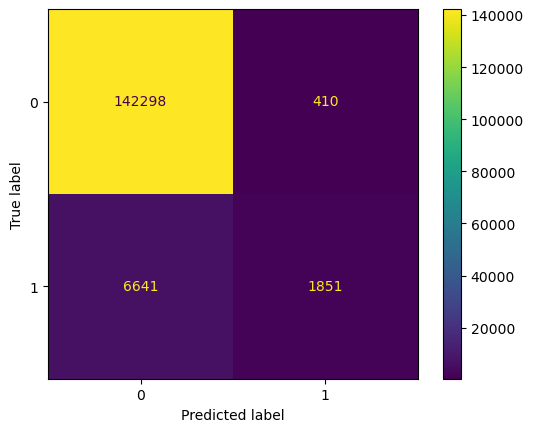

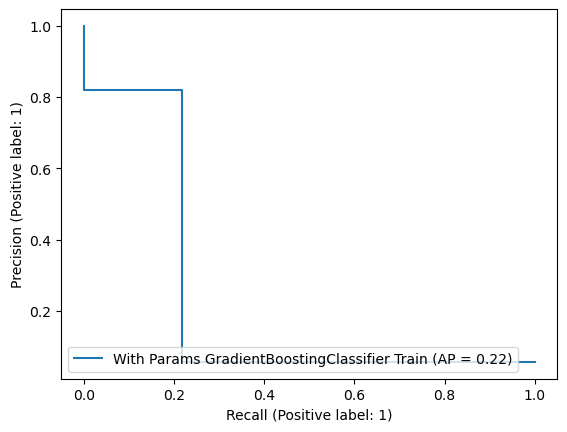

With Params GradientBoostingClassifier Test Result:
Accuracy Score: 98.44%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999744     0.784998  0.984444      0.892371      0.987683
recall         0.983771     0.995761  0.984444      0.989766      0.984444
f1-score       0.991693     0.877907  0.984444      0.934800      0.985302
support    35677.000000  2123.000000  0.984444  37800.000000  37800.000000
_______________________________________________
Confusion Matrix: 
 [[35098   579]
 [    9  2114]]

_______________________________________________
F1 Score: 
 0.877906976744186
_______________________________________________
Precision Score: 
 0.7849981433345711
_______________________________________________
Recall Score: 
 0.9957607159679699
_______________________________________________
Roc AUC Score: 
 0.9897658864757304


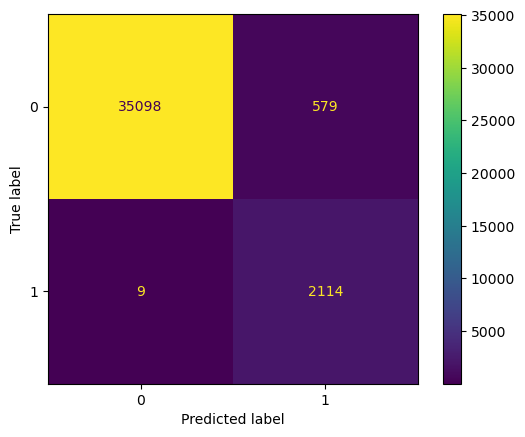

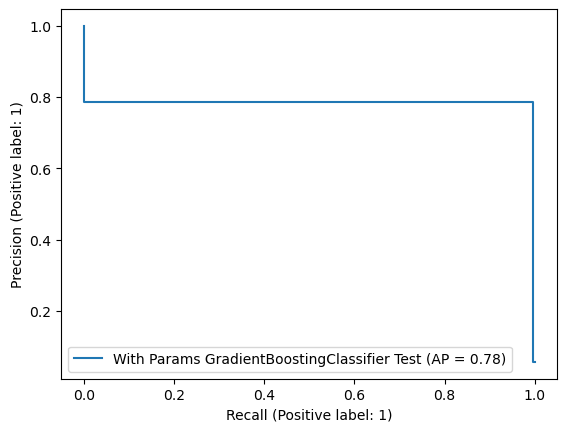

With Params LogisticRegression Train Result:
Accuracy Score: 94.89%
_______________________________________________
CLASSIFICATION REPORT:
                       0            1  accuracy      macro avg   weighted avg
precision       0.972222     0.546003  0.948876       0.759113       0.948284
recall          0.973652     0.532501  0.948876       0.753077       0.948876
f1-score        0.972937     0.539168  0.948876       0.756052       0.948574
support    142708.000000  8492.000000  0.948876  151200.000000  151200.000000
_______________________________________________
Confusion Matrix: 
 [[138948   3760]
 [  3970   4522]]

_______________________________________________
F1 Score: 
 0.5391677596279958
_______________________________________________
Precision Score: 
 0.5460033808258875
_______________________________________________
Recall Score: 
 0.5325011775788978
_______________________________________________
Roc AUC Score: 
 0.7530768353909008


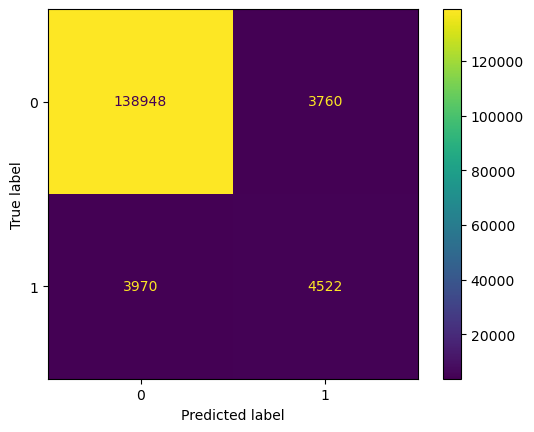

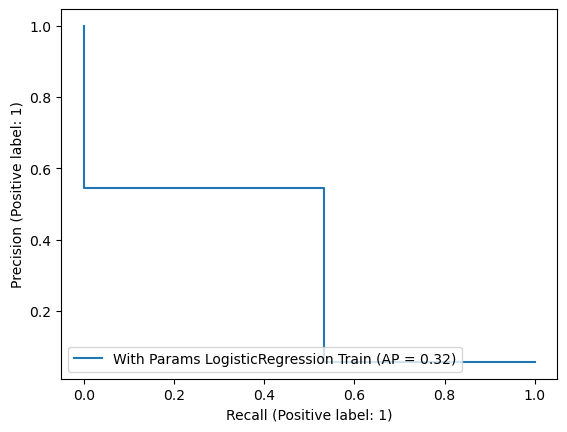

With Params LogisticRegression Test Result:
Accuracy Score: 79.88%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999964     0.218178   0.79881      0.609071      0.956056
recall         0.786865     0.999529   0.79881      0.893197      0.798810
f1-score       0.880708     0.358174   0.79881      0.619441      0.851360
support    35677.000000  2123.000000   0.79881  37800.000000  37800.000000
_______________________________________________
Confusion Matrix: 
 [[28073  7604]
 [    1  2122]]

_______________________________________________
F1 Score: 
 0.3581736855430838
_______________________________________________
Precision Score: 
 0.2181780793748715
_______________________________________________
Recall Score: 
 0.9995289684408856
_______________________________________________
Roc AUC Score: 
 0.8931972280049537


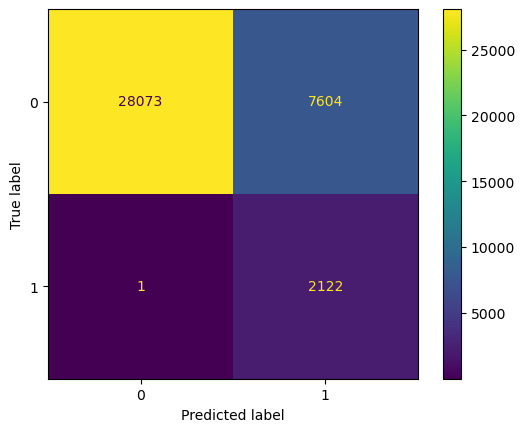

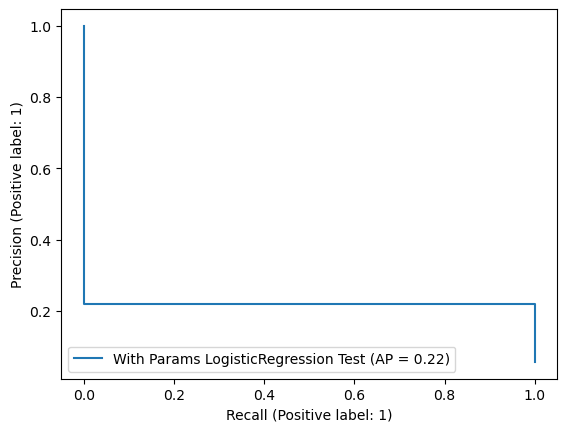

With Params XGBClassifier Train Result:
Accuracy Score: 94.85%
_______________________________________________
CLASSIFICATION REPORT:
                       0            1  accuracy      macro avg   weighted avg
precision       0.948232     0.997155  0.948459       0.972693       0.950979
recall          0.999986     0.082548  0.948459       0.541267       0.948459
f1-score        0.973421     0.152474  0.948459       0.562948       0.927314
support    142708.000000  8492.000000  0.948459  151200.000000  151200.000000
_______________________________________________
Confusion Matrix: 
 [[142706      2]
 [  7791    701]]

_______________________________________________
F1 Score: 
 0.15247417074497008
_______________________________________________
Precision Score: 
 0.9971550497866287
_______________________________________________
Recall Score: 
 0.08254828073480923
_______________________________________________
Roc AUC Score: 
 0.5412671330517671


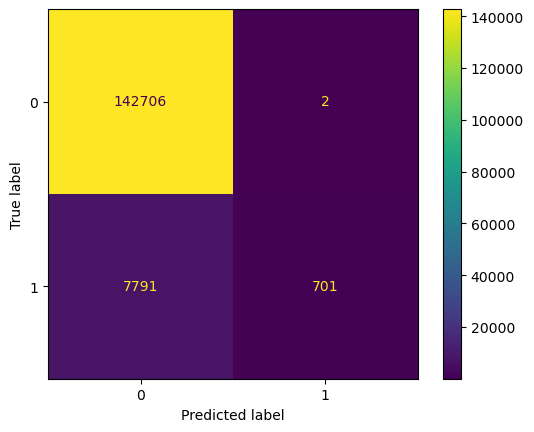

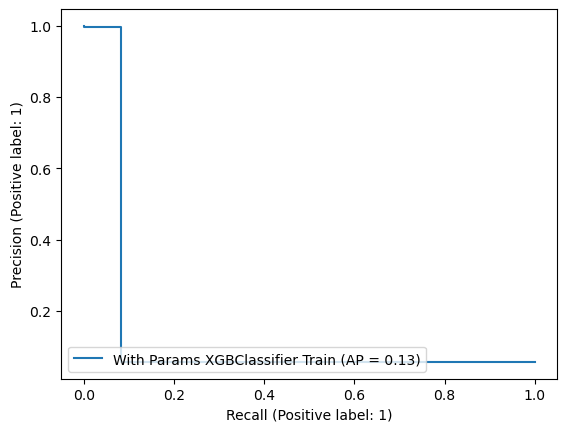

With Params XGBClassifier Test Result:
Accuracy Score: 99.97%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999664     1.000000  0.999683      0.999832      0.999683
recall         1.000000     0.994348  0.999683      0.997174      0.999683
f1-score       0.999832     0.997166  0.999683      0.998499      0.999682
support    35677.000000  2123.000000  0.999683  37800.000000  37800.000000
_______________________________________________
Confusion Matrix: 
 [[35677     0]
 [   12  2111]]

_______________________________________________
F1 Score: 
 0.9971658006613132
_______________________________________________
Precision Score: 
 1.0
_______________________________________________
Recall Score: 
 0.9943476212906265
_______________________________________________
Roc AUC Score: 
 0.9971738106453132


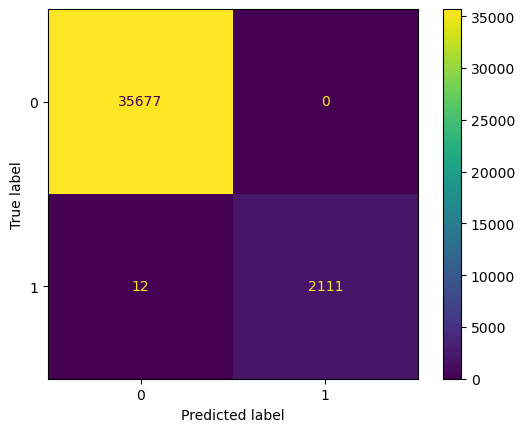

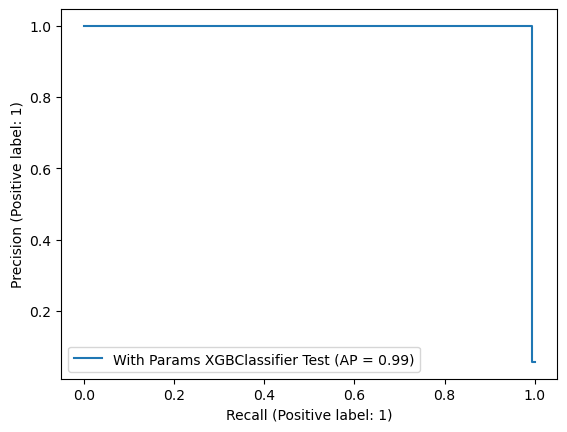

Without Params GradientBoostingClassifier Train Result:
Accuracy Score: 95.34%
_______________________________________________
CLASSIFICATION REPORT:
                       0            1  accuracy      macro avg   weighted avg
precision       0.955411     0.818664  0.953366       0.887038       0.947731
recall          0.997127     0.217970  0.953366       0.607548       0.953366
f1-score        0.975824     0.344276  0.953366       0.660050       0.940353
support    142708.000000  8492.000000  0.953366  151200.000000  151200.000000
_______________________________________________
Confusion Matrix: 
 [[142298    410]
 [  6641   1851]]

_______________________________________________
F1 Score: 
 0.34427601599553614
_______________________________________________
Precision Score: 
 0.8186643078283945
_______________________________________________
Recall Score: 
 0.21796985398021668
_______________________________________________
Roc AUC Score: 
 0.6075484272844155


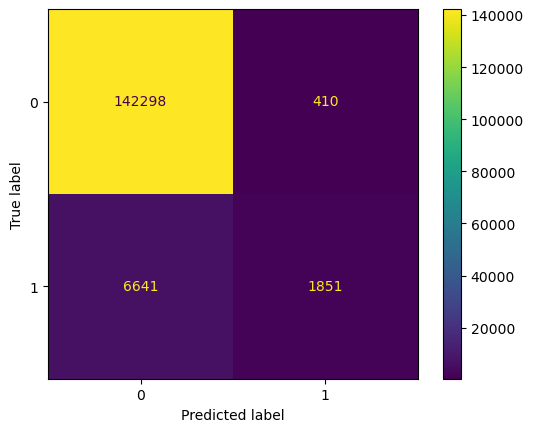

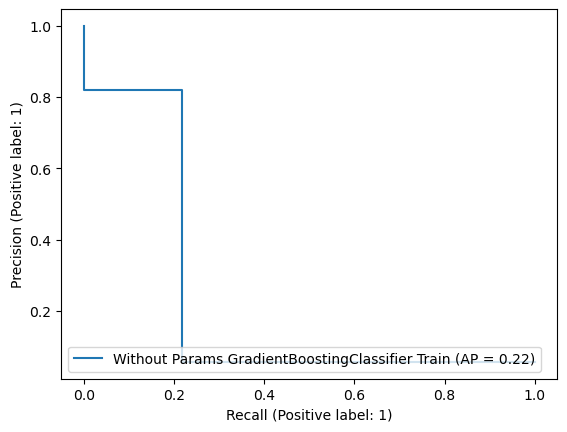

Without Params GradientBoostingClassifier Test Result:
Accuracy Score: 98.44%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999744     0.784998  0.984444      0.892371      0.987683
recall         0.983771     0.995761  0.984444      0.989766      0.984444
f1-score       0.991693     0.877907  0.984444      0.934800      0.985302
support    35677.000000  2123.000000  0.984444  37800.000000  37800.000000
_______________________________________________
Confusion Matrix: 
 [[35098   579]
 [    9  2114]]

_______________________________________________
F1 Score: 
 0.877906976744186
_______________________________________________
Precision Score: 
 0.7849981433345711
_______________________________________________
Recall Score: 
 0.9957607159679699
_______________________________________________
Roc AUC Score: 
 0.9897658864757304


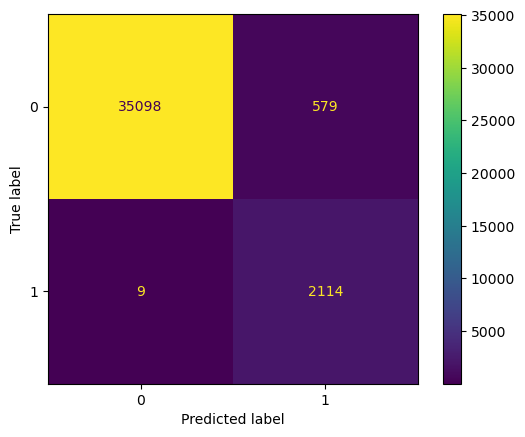

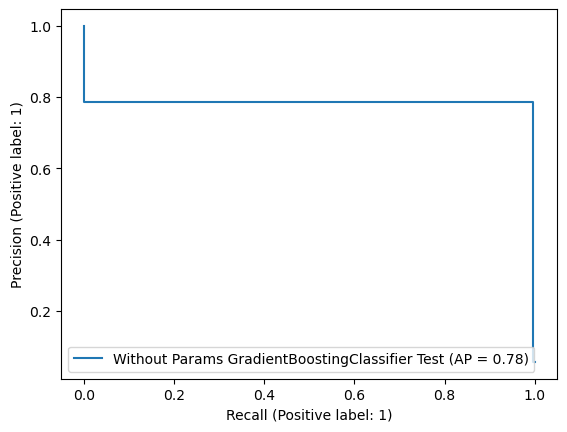

Without Params LogisticRegression Train Result:
Accuracy Score: 94.89%
_______________________________________________
CLASSIFICATION REPORT:
                       0            1  accuracy      macro avg   weighted avg
precision       0.972222     0.546003  0.948876       0.759113       0.948284
recall          0.973652     0.532501  0.948876       0.753077       0.948876
f1-score        0.972937     0.539168  0.948876       0.756052       0.948574
support    142708.000000  8492.000000  0.948876  151200.000000  151200.000000
_______________________________________________
Confusion Matrix: 
 [[138948   3760]
 [  3970   4522]]

_______________________________________________
F1 Score: 
 0.5391677596279958
_______________________________________________
Precision Score: 
 0.5460033808258875
_______________________________________________
Recall Score: 
 0.5325011775788978
_______________________________________________
Roc AUC Score: 
 0.7530768353909008


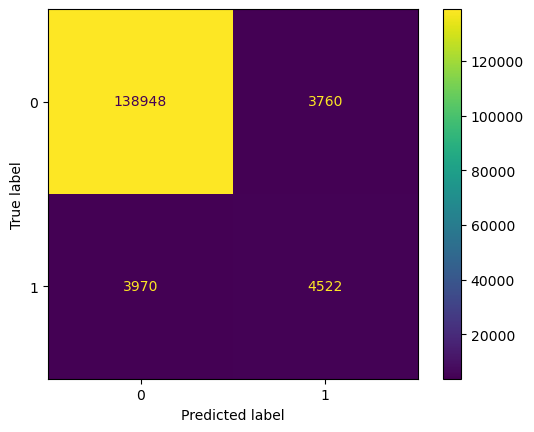

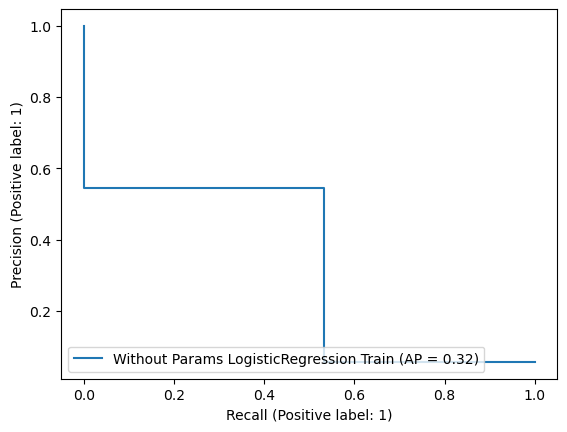

Without Params LogisticRegression Test Result:
Accuracy Score: 79.88%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999964     0.218178   0.79881      0.609071      0.956056
recall         0.786865     0.999529   0.79881      0.893197      0.798810
f1-score       0.880708     0.358174   0.79881      0.619441      0.851360
support    35677.000000  2123.000000   0.79881  37800.000000  37800.000000
_______________________________________________
Confusion Matrix: 
 [[28073  7604]
 [    1  2122]]

_______________________________________________
F1 Score: 
 0.3581736855430838
_______________________________________________
Precision Score: 
 0.2181780793748715
_______________________________________________
Recall Score: 
 0.9995289684408856
_______________________________________________
Roc AUC Score: 
 0.8931972280049537


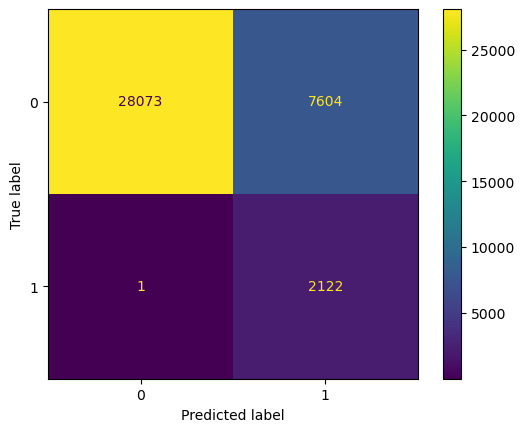

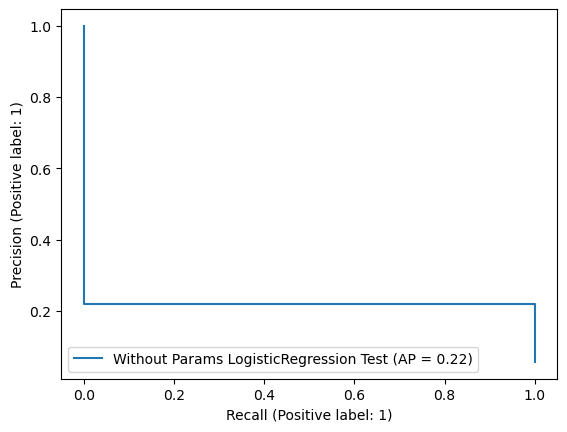

Without Params XGBClassifier Train Result:
Accuracy Score: 94.85%
_______________________________________________
CLASSIFICATION REPORT:
                       0            1  accuracy      macro avg   weighted avg
precision       0.948232     0.997155  0.948459       0.972693       0.950979
recall          0.999986     0.082548  0.948459       0.541267       0.948459
f1-score        0.973421     0.152474  0.948459       0.562948       0.927314
support    142708.000000  8492.000000  0.948459  151200.000000  151200.000000
_______________________________________________
Confusion Matrix: 
 [[142706      2]
 [  7791    701]]

_______________________________________________
F1 Score: 
 0.15247417074497008
_______________________________________________
Precision Score: 
 0.9971550497866287
_______________________________________________
Recall Score: 
 0.08254828073480923
_______________________________________________
Roc AUC Score: 
 0.5412671330517671


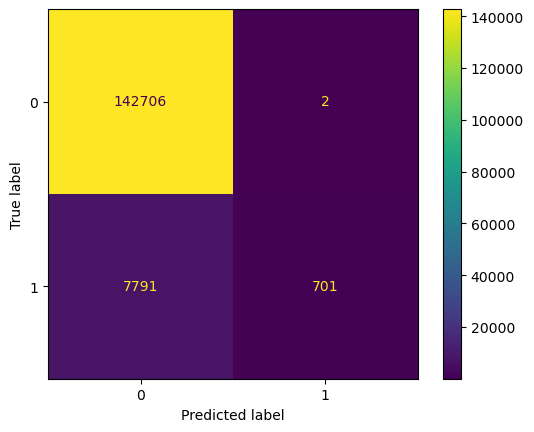

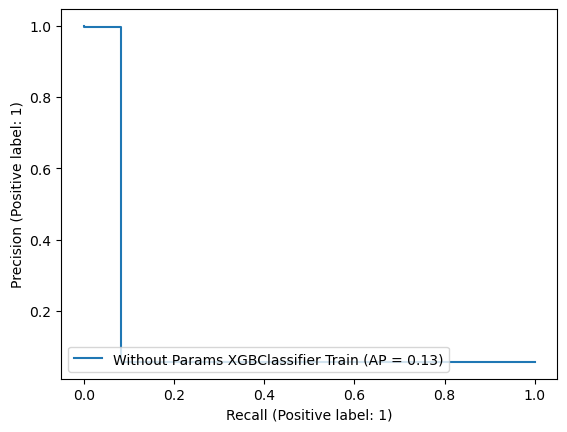

Without Params XGBClassifier Test Result:
Accuracy Score: 99.97%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999664     1.000000  0.999683      0.999832      0.999683
recall         1.000000     0.994348  0.999683      0.997174      0.999683
f1-score       0.999832     0.997166  0.999683      0.998499      0.999682
support    35677.000000  2123.000000  0.999683  37800.000000  37800.000000
_______________________________________________
Confusion Matrix: 
 [[35677     0]
 [   12  2111]]

_______________________________________________
F1 Score: 
 0.9971658006613132
_______________________________________________
Precision Score: 
 1.0
_______________________________________________
Recall Score: 
 0.9943476212906265
_______________________________________________
Roc AUC Score: 
 0.9971738106453132


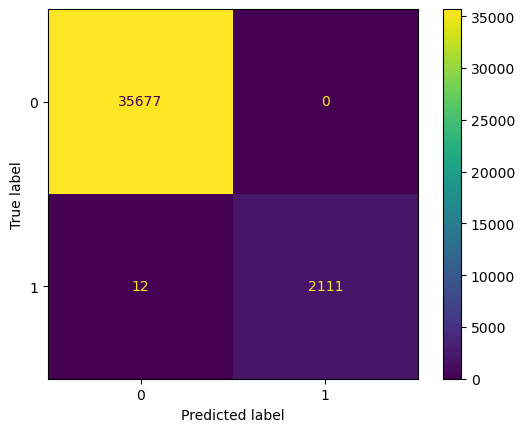

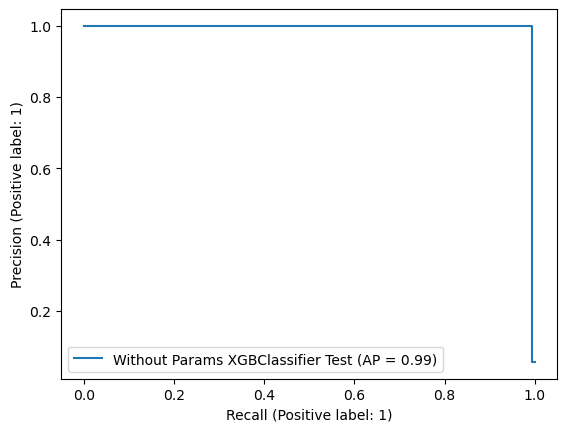

With Params IsolationForest Result:
Accuracy Score: 93.20%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.953644      0.329615  0.932037       0.641629       0.918596
recall          0.975407      0.203203  0.932037       0.589305       0.932037
f1-score        0.964403      0.251413  0.932037       0.607908       0.924358
support    178385.000000  10615.000000  0.932037  189000.000000  189000.000000
_______________________________________________
Confusion Matrix: 
 [[173998   4387]
 [  8458   2157]]

_______________________________________________
F1 Score: 
 0.2514132525205432
_______________________________________________
Precision Score: 
 0.3296149144254279
_______________________________________________
Recall Score: 
 0.20320301460197834
_______________________________________________
Roc AUC Score: 
 0.5893050698202593


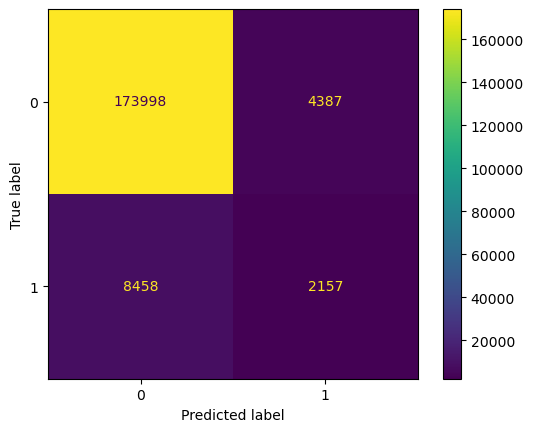

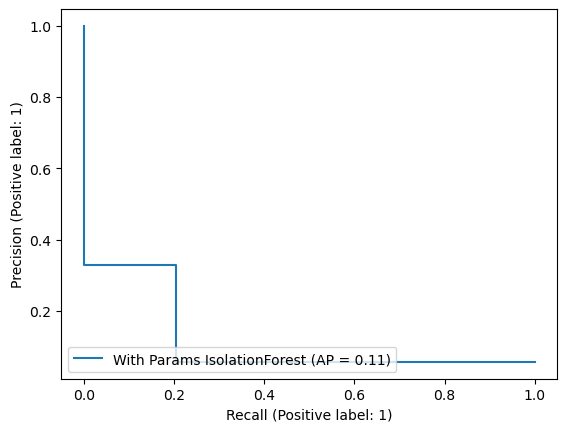

With Params SGDOneClassSVM Result:
Accuracy Score: 94.38%
_______________________________________________
CLASSIFICATION REPORT:
                       0        1  accuracy      macro avg   weighted avg
precision       0.943836      0.0  0.943836       0.471918       0.890826
recall          1.000000      0.0  0.943836       0.500000       0.943836
f1-score        0.971107      0.0  0.943836       0.485553       0.916565
support    178385.000000  10615.0  0.943836  189000.000000  189000.000000
_______________________________________________
Confusion Matrix: 
 [[178385      0]
 [ 10615      0]]

_______________________________________________
F1 Score: 
 0.0
_______________________________________________
Precision Score: 
 0.0
_______________________________________________
Recall Score: 
 0.0
_______________________________________________
Roc AUC Score: 
 0.5


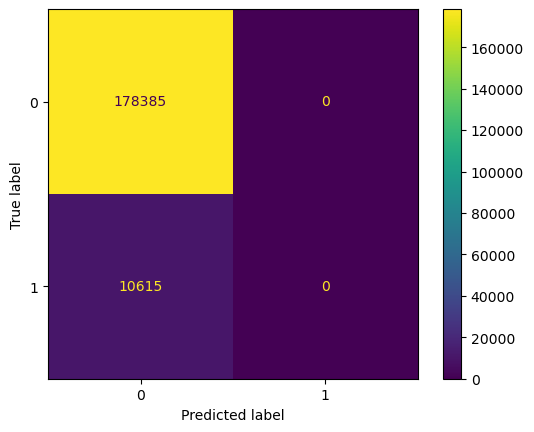

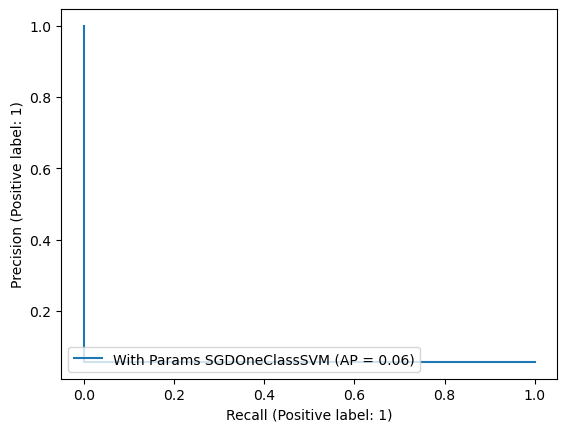

Without Params IsolationForest Result:
Accuracy Score: 93.20%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.953644      0.329615  0.932037       0.641629       0.918596
recall          0.975407      0.203203  0.932037       0.589305       0.932037
f1-score        0.964403      0.251413  0.932037       0.607908       0.924358
support    178385.000000  10615.000000  0.932037  189000.000000  189000.000000
_______________________________________________
Confusion Matrix: 
 [[173998   4387]
 [  8458   2157]]

_______________________________________________
F1 Score: 
 0.2514132525205432
_______________________________________________
Precision Score: 
 0.3296149144254279
_______________________________________________
Recall Score: 
 0.20320301460197834
_______________________________________________
Roc AUC Score: 
 0.5893050698202593


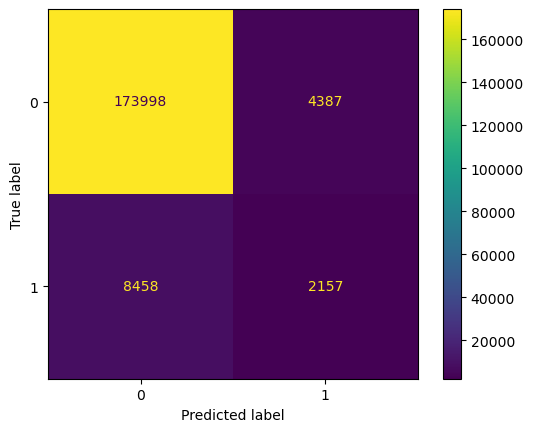

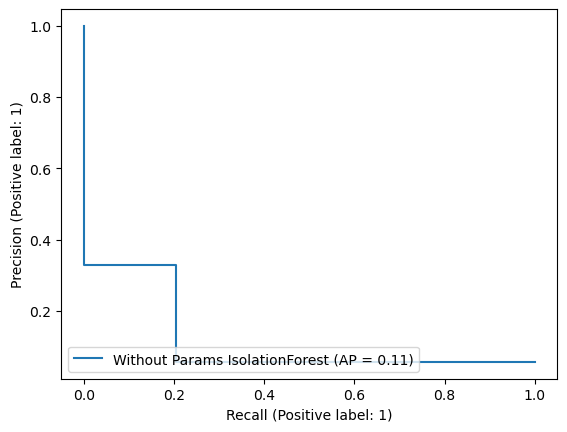

Without Params SGDOneClassSVM Result:
Accuracy Score: 94.38%
_______________________________________________
CLASSIFICATION REPORT:
                       0        1  accuracy      macro avg   weighted avg
precision       0.943836      0.0  0.943836       0.471918       0.890826
recall          1.000000      0.0  0.943836       0.500000       0.943836
f1-score        0.971107      0.0  0.943836       0.485553       0.916565
support    178385.000000  10615.0  0.943836  189000.000000  189000.000000
_______________________________________________
Confusion Matrix: 
 [[178385      0]
 [ 10615      0]]

_______________________________________________
F1 Score: 
 0.0
_______________________________________________
Precision Score: 
 0.0
_______________________________________________
Recall Score: 
 0.0
_______________________________________________
Roc AUC Score: 
 0.5


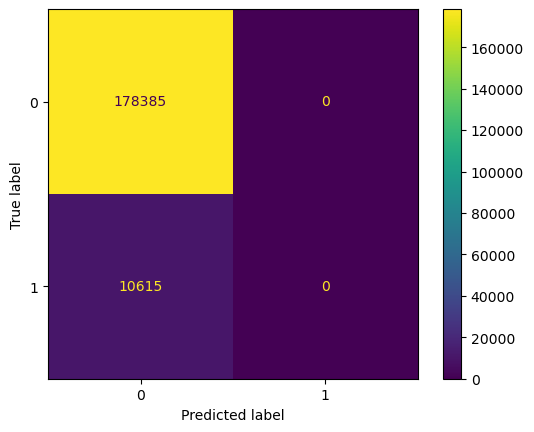

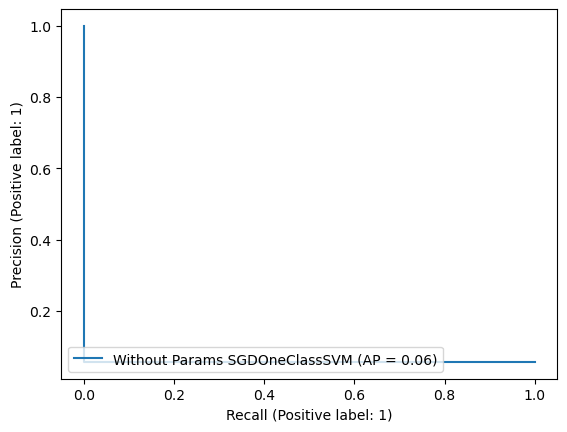

In [21]:
train = pd.read_csv(BASE_DIR + APP_SYS_NAME + '_train_params.csv')
test = pd.read_csv(BASE_DIR + APP_SYS_NAME + '_test_params.csv')

#print("Train Shape:",train.shape,"Test Shape:",test.shape)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
ohe = OneHotEncoder()

X_clusters = input_data.copy()
X_dummies = pd.get_dummies(X_clusters['clusters'])
X_clusters['label'] = le.fit_transform(X_clusters['label'])

train_dummies = pd.get_dummies(train['clusters'])
train['label'] = le.fit_transform(train['label'])

test_dummies = pd.get_dummies(test['clusters'])
test['label'] = le.fit_transform(test['label'])

for col in train_dummies.columns:
    if not col in test_dummies.columns:
        continue
    col_name = 'c_' + str(col)
    train[col_name] = train_dummies[col]
    test[col_name] = test_dummies[col]

for col in X_dummies.columns:
    col_name = 'c_' + str(col)
    X_clusters[col_name] = X_dummies[col]

for col in train.columns:
    if col not in test.columns:
        test[col] = 0

for col in test.columns:
    if col not in train.columns:
        train[col] = 0

cols_without_params = [col for col in train.columns if col.startswith('c_')]
cols_with_params = cols_without_params + [col for col in train.columns if col.startswith('p_')]

def evaluate_training_set(report_name, cols):
    # Supervised
    X_train = train[cols]
    y_train = train.loc[:,'label']
    X_test = test[cols]
    y_test = test.loc[:,'label']
    for clf in getSupervisedModels():
        clf.fit(X_train, y_train)
        train_pred = clf.predict(X_train)
        test_pred = clf.predict(X_test)
        model_name = type(clf).__name__
        report(report_name + ' ' + model_name + ' Train', train_pred, y_train)
        report(report_name + ' ' + model_name + ' Test', test_pred, y_test)

def evaluate_unsupervised(report_name, cols):
    # Unsupervised
    X = X_clusters[cols]
    y = X_clusters.loc[:,'label']
    for clf in getUnsupervisedModels():
        model_pred = clf.fit_predict(X)
        model_pred[model_pred == 1] = 0
        model_pred[model_pred == -1] = 1
        model_name = type(clf).__name__
        report(report_name + ' ' + model_name, model_pred, y)
    
evaluate_training_set('With Params', cols_without_params)
evaluate_training_set('Without Params', cols_with_params)

cols_without_params = [col for col in X_clusters.columns if col.startswith('c_')]
cols_with_params = cols_without_params + [col for col in X_clusters.columns if col.startswith('p_')]

evaluate_unsupervised('With Params', cols_without_params)
evaluate_unsupervised('Without Params', cols_with_params)

# Sliding Window

Sliding Window GradientBoostingClassifier Test Result:
Accuracy Score: 92.81%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.928783     0.701754  0.928098      0.815269      0.912183
recall         0.999029     0.028948  0.928098      0.513989      0.928098
f1-score       0.962626     0.055602  0.928098      0.509114      0.896306
support    87581.000000  6909.000000  0.928098  94490.000000  94490.000000
_______________________________________________
Confusion Matrix: 
 [[87496    85]
 [ 6709   200]]

_______________________________________________
F1 Score: 
 0.055601890464275786
_______________________________________________
Precision Score: 
 0.7017543859649122
_______________________________________________
Recall Score: 
 0.028947749312490955
_______________________________________________
Roc AUC Score: 
 0.5139886095873379


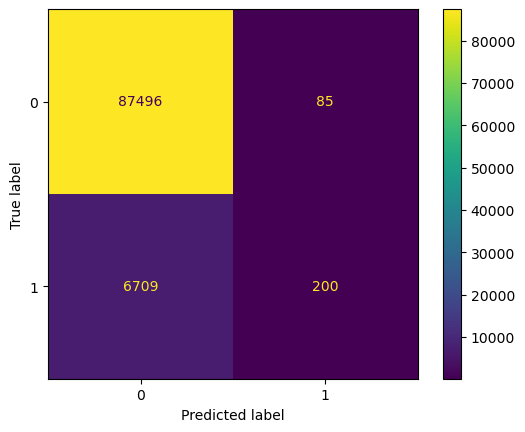

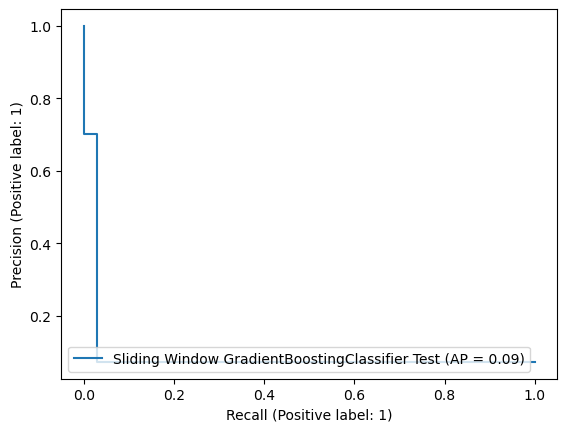

Sliding Window LogisticRegression Test Result:
Accuracy Score: 90.62%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.944385     0.335193  0.906244      0.639789      0.899842
recall         0.955093     0.287017  0.906244      0.621055      0.906244
f1-score       0.949709     0.309240  0.906244      0.629474      0.902879
support    87581.000000  6909.000000  0.906244  94490.000000  94490.000000
_______________________________________________
Confusion Matrix: 
 [[83648  3933]
 [ 4926  1983]]

_______________________________________________
F1 Score: 
 0.30923976608187137
_______________________________________________
Precision Score: 
 0.3351926977687627
_______________________________________________
Recall Score: 
 0.2870169344333478
_______________________________________________
Roc AUC Score: 
 0.6210549670282768


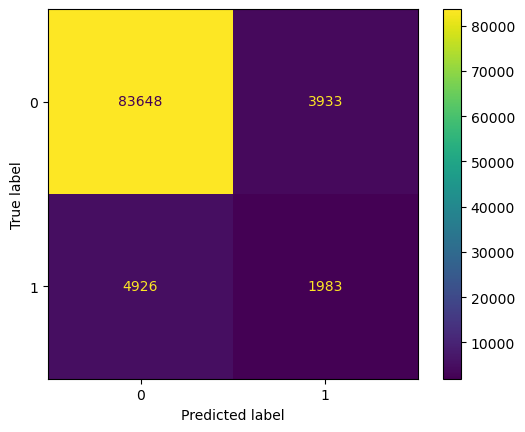

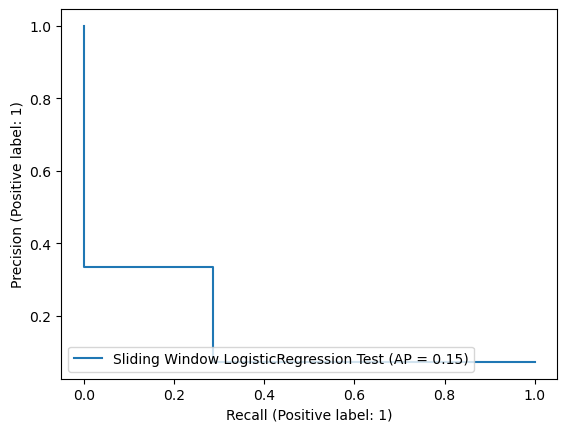

Sliding Window XGBClassifier Test Result:
Accuracy Score: 92.83%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.928359     0.878613  0.928268      0.903486      0.924721
recall         0.999760     0.022000  0.928268      0.510880      0.928268
f1-score       0.962737     0.042926  0.928268      0.502832      0.895482
support    87581.000000  6909.000000  0.928268  94490.000000  94490.000000
_______________________________________________
Confusion Matrix: 
 [[87560    21]
 [ 6757   152]]

_______________________________________________
F1 Score: 
 0.042925727195707426
_______________________________________________
Precision Score: 
 0.8786127167630058
_______________________________________________
Recall Score: 
 0.022000289477493124
_______________________________________________
Roc AUC Score: 
 0.5108802557217224


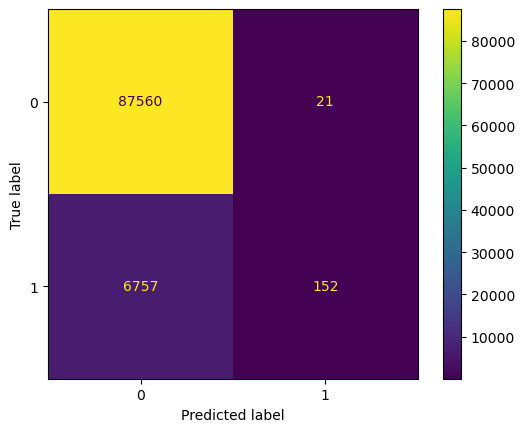

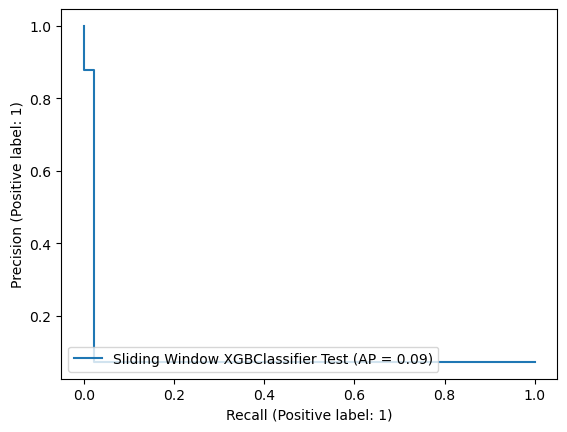

In [22]:
sliding_window_df = pd.read_csv(BASE_DIR + APP_SYS_NAME + '_sliding_window.csv')
cluster_cols = [col for col in sliding_window_df.columns if col.startswith('cluster_')]

#label_field = 'precision_label'
label_field = 'recall_label'

def simple_split(df):
    split_on = int(len(df.values)*0.50)
    train = df.values[:split_on]
    test = df.values[split_on:]
    train_df = pd.DataFrame(data=train, columns=df.columns)
    test_df = pd.DataFrame(data=test, columns=df.columns)
    return train_df, test_df

train_df, test_df = simple_split(sliding_window_df)
train_df[label_field] = train_df[label_field].astype('int')
test_df[label_field] = test_df[label_field].astype('int')

X_win_train = train_df[cluster_cols].astype('int')
y_win_train = train_df.loc[:, label_field]
X_win_test = test_df[cluster_cols].astype('int')
y_win_test = test_df.loc[:, label_field]

for clf in getSupervisedModels():
    clf.fit(X_win_train, y_win_train)
    train_pred = clf.predict(X_win_train)
    test_pred = clf.predict(X_win_test)
    model_name = type(clf).__name__
    #report('Sliding Window ' + model_name + ' Train', train_pred, y_win_train)
    report('Sliding Window ' + model_name + ' Test', test_pred, y_win_test)


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.linear_model import SGDOneClassSVM
from sklearn.neighbors import LocalOutlierFactor

X_window = sliding_window_df[cluster_cols].astype('int')
y_precision = sliding_window_df['precision_label']
y_recall = sliding_window_df['recall_label']

for clf in getUnsupervisedModels():
    model_pred = clf.fit_predict(X_window)
    model_pred[model_pred == 1] = 0
    model_pred[model_pred == -1] = 1
    model_name = type(clf).__name__
    #report(model_name + ' Precision', model_pred, y_precision)
    report('Sliding Window ' + model_name + ' Recall', model_pred, y_recall)


# TFIDF Before and After Filtering

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

for txt_col in ['text', 'tfidf_text']:
    tfidf = TfidfVectorizer()
    X_train_tfidf = tfidf.fit_transform(train[txt_col])
    print('Shape for', txt_col, X_train_tfidf.shape)
    y_train = train.loc[:,'label']
    X_test_tfidf = tfidf.transform(test[txt_col])
    y_test = test.loc[:,'label']

    for clf in getSupervisedModels():
        clf.fit(X_train_tfidf, y_train)
        train_pred = clf.predict(X_train_tfidf)
        test_pred = clf.predict(X_test_tfidf)
        model_name = type(clf).__name__
        report('TFIDF ' + txt_col + ' ' + model_name + ' Test', test_pred, y_test)

    
    X_tfidf = tfidf.fit_transform(input_data[txt_col])
    y = input_data.loc[:,'label']
    for clf in getUnsupervisedModels():
        model_pred = clf.fit_predict(X_tfidf)
        model_pred[model_pred == 1] = 0
        model_pred[model_pred == -1] = 1
        model_name = type(clf).__name__
        report('TFIDF ' + txt_col + ' ' + model_name + ' Recall', model_pred, y)


# Unsupervised Thresholds vs F1 Score

In [ ]:
X_tfidf = tfidf.fit_transform(input_data['tfidf_text'])
y = input_data.loc[:,'label']
thresholds = np.linspace(0.05, 0.5, num=10)
score_map = {'IsolationForest': {'f1s': [], 'precisions': [], 'recalls': []},
             'SGDOneClassSVM': {'f1s': [], 'precisions': [], 'recalls': []},
            }
for threshold in thresholds:
    for clf in getUnsupervisedModels(threshold):
        model_pred = clf.fit_predict(X_tfidf)
        model_pred[model_pred == 1] = 0
        model_pred[model_pred == -1] = 1
        model_name = type(clf).__name__
        f1 = f1_score(labels, model_pred)
        precision = precision_score(labels, model_pred)
        recall = recall_score(labels, model_pred)
        score_map[model_name]['f1s'].append(f1)
        score_map[model_name]['precisions'].append(precision)
        score_map[model_name]['recalls'].append(recall)
        print(f'{model_name}  F1 Score @ {round(threshold, 2)}: {round(f1, 4)}')
        print(f'{model_name} Precision @ {round(threshold, 2)}: {round(precision, 4)}')
        print(f'{model_name}    Recall @ {round(threshold, 2)}: {round(recall, 4)}')

In [ ]:

for model_name, results in score_map.items():
    f1s = results['f1s']
    precisions = results['precisions']
    recalls = results['recalls']
    plt.figure(figsize=(5, 3),dpi=250)
    plt.plot(thresholds, f1s, label='F1')
    plt.plot(thresholds, precisions, label='precision')
    plt.plot(thresholds, recalls, label='recall')
    plt.legend(loc='upper left')
    plt.title('Performance by threshold for ' + model_name + ' on ' + APP_SYS_NAME)
    plt.ylabel('score')
    plt.xlabel('nu' if model_name == 'SGDOneClassSVM' else 'contamination')
    plt.show()